In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Constants

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 25


## Loading data

In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    rotation_range=10,
)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/potato disease/training/dataset/train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)


Found 1506 images belonging to 3 classes.


In [5]:
val_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    rotation_range=10,
)

val_generator = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/potato disease/training/dataset/val",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)


Found 215 images belonging to 3 classes.


In [6]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    rotation_range=10,
)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/potato disease/training/dataset/test",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)


Found 431 images belonging to 3 classes.


In [7]:
class_names = ['Potato___Early_blight',
               'Potato___Late_blight',
               'Potato___healthy']


## EDA

In [8]:
for image, label in train_generator:
    plt.figure(figsize=(20, 20))
    i = 1
    for index in range(0, 25, 1):
        plt.subplot(5, 5, i)
        i = i+1
        plt.imshow(image[index])
        plt.xlabel(class_names[int(label[index])])
    break


Output hidden; open in https://colab.research.google.com to view.

## Model Creation and Training

In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = keras.models.Sequential([
    # cnn
    keras.layers.InputLayer(input_shape=input_shape),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(n_classes, activation="softmax")
])

model.build(input_shape=input_shape)


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [11]:
model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(
                  from_logits=False),
              metrics=["accuracy"])


In [12]:
history = model.fit(train_generator,
                    steps_per_epoch=47,
                    epochs=EPOCHS,
                    verbose=1,
                    batch_size=BATCH_SIZE,
                    validation_data=val_generator,
                    validation_steps=6)


Epoch 1/25
47/47 [==============================] - 284s 6s/step - loss: 0.8489 - accuracy: 0.5522 - val_loss: 0.6663 - val_accuracy: 0.7031
Epoch 2/25
47/47 [==============================] - 30s 630ms/step - loss: 0.5764 - accuracy: 0.7673 - val_loss: 0.3525 - val_accuracy: 0.8490
Epoch 3/25
47/47 [==============================] - 30s 639ms/step - loss: 0.4362 - accuracy: 0.8229 - val_loss: 0.2675 - val_accuracy: 0.9323
Epoch 4/25
47/47 [==============================] - 30s 636ms/step - loss: 0.2701 - accuracy: 0.9016 - val_loss: 0.1581 - val_accuracy: 0.9375
Epoch 5/25
47/47 [==============================] - 31s 662ms/step - loss: 0.1403 - accuracy: 0.9498 - val_loss: 0.1166 - val_accuracy: 0.9479
Epoch 6/25
47/47 [==============================] - 29s 625ms/step - loss: 0.1562 - accuracy: 0.9464 - val_loss: 0.1655 - val_accuracy: 0.9271
Epoch 7/25
47/47 [==============================] - 31s 660ms/step - loss: 0.0890 - accuracy: 0.9640 - val_loss: 0.0668 - val_accuracy: 0.9740
E

## Evaluation

In [13]:
scores = model.evaluate(test_generator)


14/14 [==============================] - 108s 8s/step - loss: 0.1669 - accuracy: 0.9374


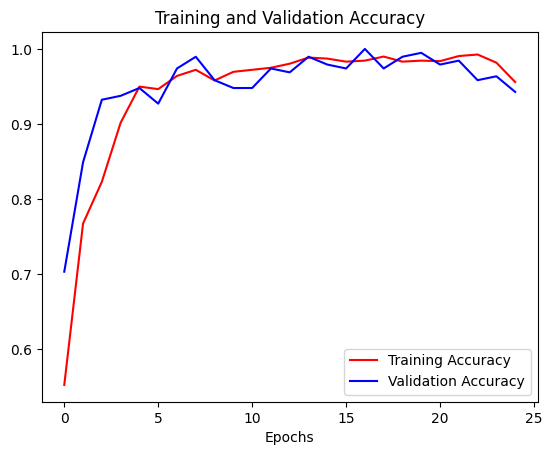

<Figure size 640x480 with 0 Axes>

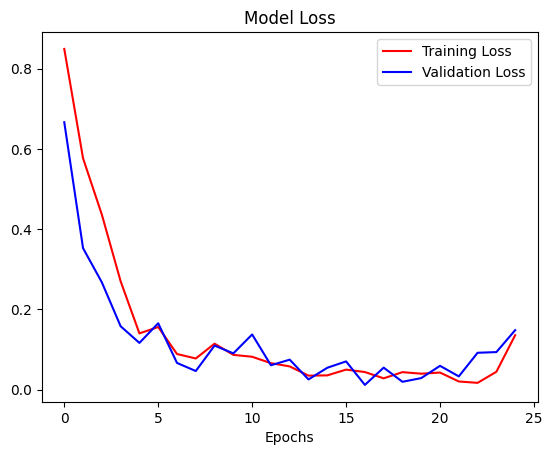

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel("Epochs")
plt.legend()
plt.show()


In [15]:
def predict(model, img):
    img_array = keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)

    predict_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predict_class, confidence


In [16]:
for images, labels in test_generator:
    plt.figure(figsize=(20, 20))
    i = 1
    for index in range(0, 25, 1):
        plt.subplot(5, 5, i)
        i = i+1
        plt.imshow(image[index])

        predicted_class, confidence = predict(model, image[index])
        actual_class = class_names[int(label[index])]

        plt.title(
            f"Actual: {actual_class}\nPredicted:{predicted_class}\nConfidence: {confidence}")
        plt.axis("off")
    break


Output hidden; open in https://colab.research.google.com to view.

In [17]:
model.save("/content/drive/MyDrive/potato disease/training/potaoes.h5")
